## Tokenizing
By **tokenizing**, you can conveniently split up text by word or by sentence. This will allow you to work with smaller pieces of text that are still relatively coherent and meaningful even outside of the context of the rest of the text. It’s your first step in turning unstructured data into structured data, which is easier to analyze.

When you’re analyzing text, you’ll be tokenizing by word and tokenizing by sentence. Here’s what both types of tokenization bring to the table:

- **Tokenizing by word**: Words are like the atoms of natural language. They’re the smallest unit of meaning that still makes sense on its own. Tokenizing your text by word allows you to identify words that come up particularly often. For example, if you were analyzing a group of job ads, then you might find that the word “Python” comes up often. That could suggest high demand for Python knowledge, but you’d need to look deeper to know more.

- **Tokenizing by sentence**: When you tokenize by sentence, you can analyze how those words relate to one another and see more context. Are there a lot of negative words around the word “Python” because the hiring manager doesn’t like Python? Are there more terms from the domain of herpetology than the domain of software development, suggesting that you may be dealing with an entirely different kind of python than you were expecting?

In [19]:
from nltk.tokenize import sent_tokenize, word_tokenize

In [20]:
example_string = """
Muad'Dib learned rapidly because his first training was in how to learn.
And the first lesson of all was the basic trust that he could learn.
It's shocking to find how many people do not believe they can learn,
and how many more believe learning to be difficult."""

In [21]:
# You can use sent_tokenize() to split up example_string into sentences:
sent_tokenize(example_string)

["\nMuad'Dib learned rapidly because his first training was in how to learn.",
 'And the first lesson of all was the basic trust that he could learn.',
 "It's shocking to find how many people do not believe they can learn,\nand how many more believe learning to be difficult."]

In [22]:
# Now try tokenizing example_string by word
word_tokenize(example_string)

["Muad'Dib",
 'learned',
 'rapidly',
 'because',
 'his',
 'first',
 'training',
 'was',
 'in',
 'how',
 'to',
 'learn',
 '.',
 'And',
 'the',
 'first',
 'lesson',
 'of',
 'all',
 'was',
 'the',
 'basic',
 'trust',
 'that',
 'he',
 'could',
 'learn',
 '.',
 'It',
 "'s",
 'shocking',
 'to',
 'find',
 'how',
 'many',
 'people',
 'do',
 'not',
 'believe',
 'they',
 'can',
 'learn',
 ',',
 'and',
 'how',
 'many',
 'more',
 'believe',
 'learning',
 'to',
 'be',
 'difficult',
 '.']

You got a list of strings that NLTK considers to be words, such as:

- `"Muad'Dib"`
- `'training'`
- `'how'`
But the following strings were also considered to be words:

- `"'s"`
- `','`
- `'.'`
See how `"It's"` was split at the apostrophe to give you `'It'` and `"'s"`, but `"Muad'Dib"` was left whole? This happened because NLTK knows that `'It'` and `"'s"` (a contraction of `“is”`) are two distinct words, so it counted them separately. But `"Muad'Dib"` isn’t an accepted contraction like `"It's"`, so it wasn’t read as two separate words and was left intact.

## Filtering Stop Words
**Stop words** are words that you want to ignore, so you filter them out of your text when you’re processing it. Very common words like `'in'`, `'is'`, and `'an'` are often used as stop words since they don’t add a lot of meaning to a text in and of themselves.

In [23]:
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\minhh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
word_quote = "Sir, I protest. I am not a merry man!"

In [25]:
# Now tokenize worf_quote by word and store the resulting list in words_in_quote
words_in_quote = word_tokenize(word_quote)
words_in_quote

['Sir', ',', 'I', 'protest', '.', 'I', 'am', 'not', 'a', 'merry', 'man', '!']

You have a list of the words in `word_quote`, so the next step is to create a set of stop words to filter `words_in_quote`. For this example, you’ll need to focus on stop words in `"english"`:

In [26]:
stop_words = set(stopwords.words("english"))

In [27]:
filtered_list = []
for word in words_in_quote:
    if word.casefold() not in stop_words:
        filtered_list.append(word)

filtered_list

['Sir', ',', 'protest', '.', 'merry', 'man', '!']

You filtered out a few words like `'am'` and `'a'`, but you also filtered out 'not', which does affect the overall meaning of the sentence. (Word won’t be happy about this.)

Words like `'I'` and `'not'` may seem too important to filter out, and depending on what kind of analysis you want to do, they can be. Here’s why:

- `'I'` is a pronoun, which are context words rather than content words:

    - **Content words** give you information about the topics covered in the text or the sentiment that the author has about those topics.

    - **Context words** give you information about writing style. You can observe patterns in how authors use context words in order to quantify their writing style. Once you’ve quantified their writing style, you can analyze a text written by an unknown author to see how closely it follows a particular writing style so you can try to identify who the author is.

- `'not'` is technically an adverb but has still been included in NLTK’s list of stop words for English. If you want to edit the list of stop words to exclude `'not'` or make other changes, then you can download it.

So, `'I'` and `'not'` can be important parts of a sentence, but it depends on what you’re trying to learn from that sentence.

## Stemming
**Stemming** is a text processing task in which you reduce words to their root, which is the core part of a word. For example, the words “helping” and “helper” share the root “help.” Stemming allows you to zero in on the basic meaning of a word rather than all the details of how it’s being used. NLTK has more than one stemmer, but you’ll be using the Porter stemmer.

In [28]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

stemmer = PorterStemmer()

In [29]:
string_for_stemming = """
The crew of the USS Discovery discovered many discoveries.
Discovering is what explorers do."""

In [30]:
words = word_tokenize(string_for_stemming)
words

['The',
 'crew',
 'of',
 'the',
 'USS',
 'Discovery',
 'discovered',
 'many',
 'discoveries',
 '.',
 'Discovering',
 'is',
 'what',
 'explorers',
 'do',
 '.']

In [31]:
stemmed_words = [stemmer.stem(word) for word in words]

stemmed_words

['the',
 'crew',
 'of',
 'the',
 'uss',
 'discoveri',
 'discov',
 'mani',
 'discoveri',
 '.',
 'discov',
 'is',
 'what',
 'explor',
 'do',
 '.']

Those results look a little inconsistent. Why would `'Discovery'` give you `'discoveri'` when `'Discovering'` gives you `'discov'`?

Understemming and overstemming are two ways stemming can go wrong:

1. **Understemming** happens when two related words should be reduced to the same stem but aren’t. This is a false negative.
2. **Overstemming** happens when two unrelated words are reduced to the same stem even though they shouldn’t be. This is a false positive.

The Porter stemming algorithm dates from 1979, so it’s a little on the older side. The **Snowball stemmer**, which is also called **Porter2**, is an improvement on the original and is also available through NLTK, so you can use that one in your own projects. It’s also worth noting that the purpose of the Porter stemmer is not to produce complete words but to find variant forms of a word.

## Tagging Parts of Speech
**Part of speech** is a grammatical term that deals with the roles words play when you use them together in sentences. Tagging parts of speech, or **POS tagging**, is the task of labeling the words in your text according to their part of speech.

In [32]:
sagan_quote = """
If you wish to make an apple pie from scratch,
you must first invent the universe."""

In [33]:
words_in_sagan_quote = word_tokenize(sagan_quote)

In [34]:
nltk.pos_tag(words_in_sagan_quote)

[('If', 'IN'),
 ('you', 'PRP'),
 ('wish', 'VBP'),
 ('to', 'TO'),
 ('make', 'VB'),
 ('an', 'DT'),
 ('apple', 'NN'),
 ('pie', 'NN'),
 ('from', 'IN'),
 ('scratch', 'NN'),
 (',', ','),
 ('you', 'PRP'),
 ('must', 'MD'),
 ('first', 'VB'),
 ('invent', 'VB'),
 ('the', 'DT'),
 ('universe', 'NN'),
 ('.', '.')]

All the words in the quote are now in a separate tuple, with a tag that represents their part of speech. But what do the tags mean? Here’s how to get a list of tags and their meanings:

In [35]:
# nltk.help.upenn_tagset()

Now that you know what the POS tags mean, you can see that your tagging was fairly successful:

- `'pie'` was tagged `NN` because it’s a singular noun.
- `'you'` was tagged `PRP` because it’s a personal pronoun.
- `'invent'` was tagged `VB` because it’s the base form of a verb.
But how would NLTK handle tagging the parts of speech in a text that is basically gibberish? Jabberwocky is a nonsense poem that doesn’t technically mean much but is still written in a way that can convey some kind of meaning to English speakers.

In [36]:
jabberwocky_excerpt = """
'Twas brillig, and the slithy toves did gyre and gimble in the wabe:
all mimsy were the borogoves, and the mome raths outgrabe."""

word_in_excerpt = word_tokenize(jabberwocky_excerpt)

nltk.pos_tag(word_in_excerpt)

[("'Twas", 'CD'),
 ('brillig', 'NN'),
 (',', ','),
 ('and', 'CC'),
 ('the', 'DT'),
 ('slithy', 'JJ'),
 ('toves', 'NNS'),
 ('did', 'VBD'),
 ('gyre', 'NN'),
 ('and', 'CC'),
 ('gimble', 'JJ'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('wabe', 'NN'),
 (':', ':'),
 ('all', 'DT'),
 ('mimsy', 'NNS'),
 ('were', 'VBD'),
 ('the', 'DT'),
 ('borogoves', 'NNS'),
 (',', ','),
 ('and', 'CC'),
 ('the', 'DT'),
 ('mome', 'JJ'),
 ('raths', 'NNS'),
 ('outgrabe', 'RB'),
 ('.', '.')]

Accepted English words like `'and`' and `'the'` were correctly tagged as a conjunction and a determiner, respectively. The gibberish word `'slithy'` was tagged as an adjective, which is what a human English speaker would probably assume from the context of the poem as well. Way to go, NLTK!

## Lemmatizing
Now that you’re up to speed on parts of speech, you can circle back to lemmatizing. Like stemming, **lemmatizing** reduces words to their core meaning, but it will give you a complete English word that makes sense on its own instead of just a fragment of a word like `'discoveri'`.

In [37]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

In [38]:
lemmatizer.lemmatize('scarves')

'scarf'

In [39]:
string_for_lemmatizing = "The friends of DeSoto love scarves."
words = word_tokenize(string_for_lemmatizing)

lemmatized_words = [lemmatizer.lemmatize(word) for word in words]

lemmatized_words

['The', 'friend', 'of', 'DeSoto', 'love', 'scarf', '.']

That looks right. The plurals `'friends'` and `'scarves'` became the singulars `'friend'` and `'scarf'`.

But what would happen if you lemmatized a word that looked very different from its lemma? Try lemmatizing `"worst"`:

In [40]:
lemmatizer.lemmatize('worst')

'worst'

You got the result `'worst'` because `lemmatizer.lemmatize()` assumed that `"worst"` was a noun. You can make it clear that you want `"worst"` to be an adjective:

In [41]:
lemmatizer.lemmatize('worst', pos='a')

'bad'

The default parameter for pos is `'n'` for noun, but you made sure that `"worst"` was treated as an adjective by adding the parameter `pos="a"`. As a result, you got `'bad'`, which looks very different from your original word and is nothing like what you’d get if you were stemming. This is because `"worst"` is the superlative form of the adjective `'bad'`, and lemmatizing reduces superlatives as well as comparatives to their lemmas.

## Chunking
While tokenizing allows you to identify words and sentences, **chunking** allows you to identify **phrases**.

Chunking makes use of POS tags to group words and apply chunk tags to those groups. Chunks don’t overlap, so one instance of a word can be in only one chunk at a time.

In [42]:
lotr_quote = "It's a dangerous business, Frodo, going out your door."

words_in_lotr = word_tokenize(lotr_quote)

In [43]:
nltk.download('averaged_perceptron_tagger')
lotr_pos_tags = nltk.pos_tag(words_in_lotr)
lotr_pos_tags

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\minhh\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('It', 'PRP'),
 ("'s", 'VBZ'),
 ('a', 'DT'),
 ('dangerous', 'JJ'),
 ('business', 'NN'),
 (',', ','),
 ('Frodo', 'NNP'),
 (',', ','),
 ('going', 'VBG'),
 ('out', 'RP'),
 ('your', 'PRP$'),
 ('door', 'NN'),
 ('.', '.')]

You’ve got a list of tuples of all the words in the quote, along with their POS tag. In order to chunk, you first need to define a chunk grammar.

In [44]:
grammar = 'NP: {<DT>?<JJ>*<NN>}'

NP stands for noun phrase. You can learn more about noun phrase chunking in [Chapter 7](https://www.nltk.org/book/ch07.html#noun-phrase-chunking) of Natural Language Processing with Python—Analyzing Text with the Natural Language Toolkit.

According to the rule you created, your chunks:

1. Start with an optional (?) determiner ('DT')
2. Can have any number (*) of adjectives (JJ)
3. End with a noun (<NN>)

In [45]:
chunk_parser = nltk.RegexpParser(grammar)

In [46]:
tree = chunk_parser.parse(lotr_pos_tags)

In [47]:
tree.draw()

## Chinking
Chinking is used together with chunking, but while chunking is used to include a pattern, chinking is used to exclude a pattern.

Let’s reuse the quote you used in the section on chunking. You already have a list of tuples containing each of the words in the quote along with its part of speech tag:

In [48]:
lotr_pos_tags

[('It', 'PRP'),
 ("'s", 'VBZ'),
 ('a', 'DT'),
 ('dangerous', 'JJ'),
 ('business', 'NN'),
 (',', ','),
 ('Frodo', 'NNP'),
 (',', ','),
 ('going', 'VBG'),
 ('out', 'RP'),
 ('your', 'PRP$'),
 ('door', 'NN'),
 ('.', '.')]

The next step is to create a grammar to determine what you want to include and exclude in your chunks. This time, you’re going to use more than one line because you’re going to have more than one rule. Because you’re using more than one line for the grammar, you’ll be using triple quotes ("""):

In [49]:
grammar = """
Chunk: {<.*>+}
       }<JJ>{"""

The first rule of your grammar is `{<.*>+}`. This rule has curly braces that face inward `({})` because it’s used to determine what patterns you want to include in you chunks. In this case, you want to include everything: `<.*>+`.

The second rule of your grammar is `}<JJ>{`. This rule has curly braces that face outward `(}{)` because it’s used to determine what patterns you want to exclude in your chunks. In this case, you want to exclude adjectives: `<JJ>`.

Create a chunk parser with this grammar:

In [50]:
chunk_parser = nltk.RegexpParser(grammar)

In [51]:
tree = chunk_parser.parse(lotr_pos_tags)
tree

The Ghostscript executable isn't found.
See http://web.mit.edu/ghostscript/www/Install.htm
If you're using a Mac, you can try installing
https://docs.brew.sh/Installation then `brew install ghostscript`


LookupError: 

Tree('S', [Tree('Chunk', [('It', 'PRP'), ("'s", 'VBZ'), ('a', 'DT')]), ('dangerous', 'JJ'), Tree('Chunk', [('business', 'NN'), (',', ','), ('Frodo', 'NNP'), (',', ','), ('going', 'VBG'), ('out', 'RP'), ('your', 'PRP$'), ('door', 'NN'), ('.', '.')])])

## Using Named Entity Recognition (NER)
**Named entities** are noun phrases that refer to specific locations, people, organizations, and so on. With **named entity recognition**, you can find the named entities in your texts and also determine what kind of named entity they are.

| NE type | Examples |
| --- | --- |
| ORGANIZATION | Georgia-Pacific Corp., WHO |
| PERSON | Eddy Bonte, President Obama |
| LOCATION | Murray River, Mount Everest |
| DATE | June, 2008-06-29 |
| TIME | two fifty a m, 1:30 p.m. |
| MONEY | 175 million Canadian dollars, GBP 10.40 |
| PERCENT | twenty pct, 18.75 % |
| FACILITY | Washington Monument, Stonehenge |
| GPE | South East Asia, Midlothian |

In [52]:
nltk.download('maxent_ne_chunker')
nltk.download('words')
tree = nltk.ne_chunk(lotr_pos_tags)
tree

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\minhh\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping chunkers\maxent_ne_chunker.zip.
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\minhh\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\words.zip.
The Ghostscript executable isn't found.
See http://web.mit.edu/ghostscript/www/Install.htm
If you're using a Mac, you can try installing
https://docs.brew.sh/Installation then `brew install ghostscript`


LookupError: 

Tree('S', [('It', 'PRP'), ("'s", 'VBZ'), ('a', 'DT'), ('dangerous', 'JJ'), ('business', 'NN'), (',', ','), Tree('PERSON', [('Frodo', 'NNP')]), (',', ','), ('going', 'VBG'), ('out', 'RP'), ('your', 'PRP$'), ('door', 'NN'), ('.', '.')])

In [53]:
quote = """
Men like Schiaparelli watched the red planet—it is odd, by-the-bye, that
for countless centuries Mars has been the star of war—but failed to
interpret the fluctuating appearances of the markings they mapped so well.
All that time the Martians must have been getting ready.

During the opposition of 1894 a great light was seen on the illuminated
part of the disk, first at the Lick Observatory, then by Perrotin of Nice,
and then by other observers. English readers heard of it first in the
issue of Nature dated August 2."""

In [57]:
def extract_ne(quote, language):
    words = word_tokenize(quote, language=language)
    tags = nltk.pos_tag(words)
    tree = nltk.ne_chunk(tags, binary=True)
    return set(
        " ".join(i[0] for i in t)
        for t in tree if hasattr(t, "label") and t.label() == 'NE'
    )

With this function, you gather all named entities, with no repeats. In order to do that, you tokenize by word, apply part of speech tags to those words, and then extract named entities based on those tags. Because you included binary=True, the named entities you’ll get won’t be labeled more specifically. You’ll just know that they’re named entities

In [58]:
extract_ne(quote, 'english')

{'Lick Observatory', 'Mars', 'Nature', 'Perrotin', 'Schiaparelli'}

## Getting Text to Analyze
Now that you’ve done some text processing tasks with small example texts, you’re ready to analyze a bunch of texts at once. A group of texts is called a **corpus**. NLTK provides several **corpora** covering everything from novels hosted by Project Gutenberg to inaugural speeches by presidents of the United States.

In order to analyze texts in NLTK, you first need to import them. This requires `nltk.download("book")`, which is a pretty big download:

In [59]:
nltk.download('book')
from nltk.book import *

[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\minhh\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\abc.zip.
[nltk_data]    | Downloading package brown to
[nltk_data]    |     C:\Users\minhh\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\brown.zip.
[nltk_data]    | Downloading package chat80 to
[nltk_data]    |     C:\Users\minhh\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\chat80.zip.
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\minhh\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\cmudict.zip.
[nltk_data]    | Downloading package conll2000 to
[nltk_data]    |     C:\Users\minhh\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\conll2000.zip.
[nltk_data]    | Downloading package conll2002 to
[nltk_data]    |     C:\Users\minhh\AppData\Roaming\nltk_data...
[nltk_data]    |   U

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


### Using a Concordance
When you use a concordance, you can see each time a word is used, along with its immediate context. This can give you a peek into how a word is being used at the sentence level and what words are used with it.

Let’s see what these good people looking for love have to say! The personals corpus is called text8, so we’re going to call `.concordance()` on it with the parameter `"man"`:

In [60]:
text8.concordance('man')

Displaying 14 of 14 matches:
 to hearing from you all . ABLE young man seeks , sexy older women . Phone for 
ble relationship . GENUINE ATTRACTIVE MAN 40 y . o ., no ties , secure , 5 ft .
ship , and quality times . VIETNAMESE MAN Single , never married , financially 
ip . WELL DRESSED emotionally healthy man 37 like to meet full figured woman fo
 nth subs LIKE TO BE MISTRESS of YOUR MAN like to be treated well . Bold DTE no
eeks lady in similar position MARRIED MAN 50 , attrac . fit , seeks lady 40 - 5
eks nice girl 25 - 30 serious rship . Man 46 attractive fit , assertive , and k
 40 - 50 sought by Aussie mid 40s b / man f / ship r / ship LOVE to meet widowe
discreet times . Sth E Subs . MARRIED MAN 42yo 6ft , fit , seeks Lady for discr
woman , seeks professional , employed man , with interests in theatre , dining 
 tall and of large build seeks a good man . I am a nonsmoker , social drinker ,
lead to relationship . SEEKING HONEST MAN I am 41 y . o ., 5 ft . 4 , med . bui
 quiet time

### Making a Dispersion Plot
You can use a dispersion plot to see how much a particular word appears and where it appears. So far, we’ve looked for "man" and "woman", but it would be interesting to see how much those words are used compared to their synonyms:

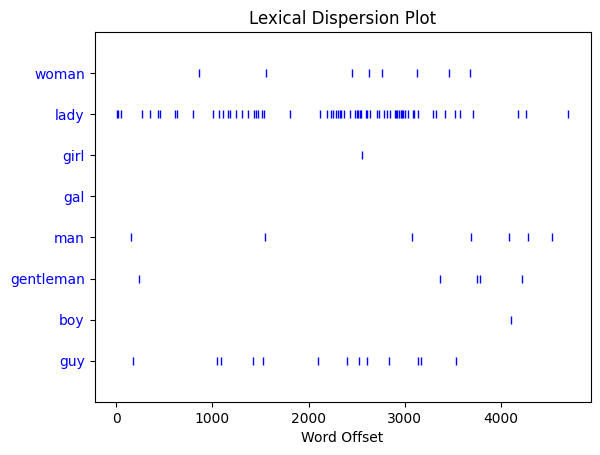

In [61]:
text8.dispersion_plot(
    ['woman', 'lady', 'girl', 'gal', 'man', 'gentleman', 'boy', 'guy']
)

Each vertical blue line represents one instance of a word. Each horizontal row of blue lines represents the corpus as a whole. This plot shows that:

- `"lady"` was used a lot more than `"woman"` or `"girl"`. There were no instances of `"gal"`.
- `"man"` and `"guy"` were used a similar number of times and were more common than `"gentleman"` or `"boy"`.

### Making a Frequency Distribution
With a frequency distribution, you can check which words show up most frequently in your text. You’ll need to get started with an import:

In [62]:
from nltk import FreqDist

frequency_distribution = FreqDist(text8)
print(frequency_distribution)

<FreqDist with 1108 samples and 4867 outcomes>


In [63]:
frequency_distribution.most_common(20)

[(',', 539),
 ('.', 353),
 ('/', 110),
 ('for', 99),
 ('and', 74),
 ('to', 74),
 ('lady', 68),
 ('-', 66),
 ('seeks', 60),
 ('a', 52),
 ('with', 44),
 ('S', 36),
 ('ship', 33),
 ('&', 30),
 ('relationship', 29),
 ('fun', 28),
 ('in', 27),
 ('slim', 27),
 ('build', 27),
 ('o', 26)]

In [64]:
meaningful_words = [
    word for word in text8 if word.casefold() not in stop_words
]

In [66]:
frequency_distribution = FreqDist(meaningful_words)
frequency_distribution.most_common(20)

[(',', 539),
 ('.', 353),
 ('/', 110),
 ('lady', 68),
 ('-', 66),
 ('seeks', 60),
 ('ship', 33),
 ('&', 30),
 ('relationship', 29),
 ('fun', 28),
 ('slim', 27),
 ('build', 27),
 ('smoker', 23),
 ('50', 23),
 ('non', 22),
 ('movies', 22),
 ('good', 21),
 ('honest', 20),
 ('dining', 19),
 ('rship', 18)]

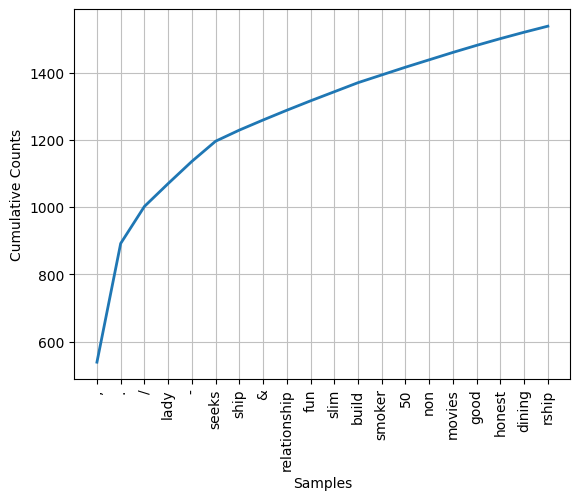

<AxesSubplot: xlabel='Samples', ylabel='Cumulative Counts'>

In [67]:
frequency_distribution.plot(20, cumulative=True)

### Finding Collocations
A collocation is a sequence of words that shows up often. If you’re interested in common collocations in English, then you can check out The BBI Dictionary of English Word Combinations. It’s a handy reference you can use to help you make sure your writing is idiomatic. Here are some examples of collocations that use the word “tree”:

- Syntax tree
- Family tree
- Decision tree
To see pairs of words that come up often in your corpus, you need to call .collocations() on it:

In [68]:
text8.collocations()

would like; medium build; social drinker; quiet nights; non smoker;
long term; age open; Would like; easy going; financially secure; fun
times; similar interests; Age open; weekends away; poss rship; well
presented; never married; single mum; permanent relationship; slim
build
